In [109]:
from IPython.display import display, HTML 
display(HTML("""
<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:15pt;}
div.output {font-size:15pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:15pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:15px;}
</style>
 """))

<span style="color:green; font-size: 30px; font-weight: bold;">
# 4절. 복사와 뷰 </span>
    
## 4.1 할당

In [2]:
import numpy as np

In [3]:
a = np.arange(6)
a

array([0, 1, 2, 3, 4, 5])

In [6]:
b = a

In [7]:
#a와 b가 같은 객체인지 확인하는 방법
a is b

True

In [12]:
b.shape = (2,-1)
b

array([[0, 1, 2],
       [3, 4, 5]])

In [13]:
a #a의 값도 바뀜

array([[0, 1, 2],
       [3, 4, 5]])

## 4.2 뷰(view)
- 슬라이싱할 경우 자동 view생성

In [14]:
c = np.arange(12).reshape(2,-1)
c

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

In [16]:
d = c.view() #view c의 복제본으로 만듬(얕은 복사)
d is c #c객체와 d객체가 같은지 확인하는 방법

False

In [17]:
id(c), id(d)

(3090618593328, 3090606997104)

In [20]:
c == d #주소는 다르나 c와 d의 내용이 같음을 확인함

array([[ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True]])

In [21]:
np.all(c==d) #주소는 다르나 c와 d의 내용이 같음을 확인함

True

In [22]:
#d를 변경하면? c도 바뀔까?
d.shape = (3,4)  #d의 구조를 바꿈
d

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [23]:
c #원본이 바뀌지 않았음. 

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

In [24]:
#d의 데이터를 0번 방의 짝수 인덱스만 바꾸기
d[0,::2] = -99
d

array([[-99,   1, -99,   3],
       [  4,   5,   6,   7],
       [  8,   9,  10,  11]])

In [25]:
c #c의 값도 같이 변하는 얕은 복사됨

array([[-99,   1, -99,   3,   4,   5],
       [  6,   7,   8,   9,  10,  11]])

In [28]:
# 슬라이싱이 될 때 자동 view가 반환이 됨
c = np.arange(12).reshape(2,6)
c

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

In [29]:
d = c[:,:-1] #독립변수 제외하고 불러옴
d

array([[ 0,  1,  2,  3,  4],
       [ 6,  7,  8,  9, 10]])

In [31]:
# d[-1,-1] = 99
d[...,-1] = 99 #슬라이싱을하면 원본도 억세스되어서 바뀜
d

array([[ 0,  1,  2,  3, 99],
       [ 6,  7,  8,  9, 99]])

## 4.3 깊은 복사

In [37]:
c = np.arange(12).reshape(2,6)
c

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

In [39]:
d = c[:,:-1].copy()
d[...,-1] = 99
d

array([[ 0,  1,  2,  3, 99],
       [ 6,  7,  8,  9, 99]])

In [40]:
c

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

# 5절. 고급인덱싱
## 5.1 인덱스 배열로 인덱싱

In [41]:
a = np.arange(12)**2
a

array([  0,   1,   4,   9,  16,  25,  36,  49,  64,  81, 100, 121])

In [45]:
a[[0,0,0,1,5]] #[0,0,1,5]리스트로 만들수 있지만 배열로도 만들 수 잇음

array([ 0,  0,  0,  1, 25])

In [46]:
# 인덱싱 하기 위한 값을 배열로 만들기
i = np.array([0,0,1,5])
a[i]

array([ 0,  0,  1, 25])

In [47]:
# 인덱싱 하기 위한 값을 2차원 배열로 만들기
# 이미지 딥러닝할때 쓰임

j = np.array([[0,0],
             [1,5]])
a[j]

array([[ 0,  0],
       [ 1, 25]])

In [90]:
palette = np.array([[116, 116, 116],           #black
                    [255, 178, 245],           #red 
                    [183, 240, 177],           #green
                    [178, 204, 255],           #blue
                    [255, 255, 255]])          #white

In [91]:
palette[[[4, 0],
         [0, 4]]]

array([[[255, 255, 255],
        [116, 116, 116]],

       [[116, 116, 116],
        [255, 255, 255]]])

In [92]:
image_index = np.array([[4,4,4,0,0,0,0,4,4,4],
                        [4,0,0,4,4,4,4,0,0,4],
                        [0,0,4,4,4,4,4,4,0,0],
                        [0,4,4,1,4,4,3,4,4,0],
                        [0,4,4,1,4,4,3,4,4,0],
                        [0,4,4,4,4,4,4,4,4,0],
                        [0,4,2,2,4,4,2,2,4,0],
                        [4,0,4,2,2,2,2,4,0,4],
                        [4,4,0,4,4,4,4,0,4,4],
                        [4,4,4,0,0,0,0,4,4,4]])

In [93]:
image_data = palette[image_index]

In [95]:
image_data.ndim #차원 확인 .3차원

3

In [96]:
image_data.shape

(10, 10, 3)

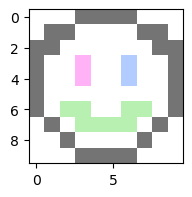

In [99]:
from matplotlib import pyplot as plt
plt.figure(figsize=(2,2))
plt.imshow(image_data)
# %matplotlib inline
# plt.imshow(image_data, interpolation='nearest')
plt.show()

## 5.2 논리 배열을 이용한 인덱싱

In [100]:
a = np.array([0,1,10,11,12,13,14,15,16,99])
a 

array([ 0,  1, 10, 11, 12, 13, 14, 15, 16, 99])

In [101]:
a%2==0

array([ True, False,  True, False,  True, False,  True, False,  True,
       False])

In [103]:
#논리배열 (배열과 데이터 프레임에서만 가능!)
# a [[ True,False,True,False,True,False,True,False,True,False]]
a [a%2==0]

array([ 0, 10, 12, 14, 16])

In [104]:
#a에서 12보다 큰 값만 출력
a[a>12]

array([13, 14, 15, 16, 99])

# 6절. 선형대수
- 2차원 넘파이배열을 행렬 \
    **행렬곱   : @,dot(),단위행렬** \
    **역행렬   : np.linalg.inv(행렬) : 역행렬@행렬 = 단위행렬** \
    ※정방행렬일때 역행렬을 구할 수 있음, 행수와 열수가 같을때  \
    **전치행렬 : 행렬.T/행렬.transpose()**

In [107]:
# 역행렬 구하기(정방행렬일때 구할 수 있음)
a = np.array([[1,2],
              [3,4]])
a

array([[1, 2],
       [3, 4]])

In [110]:
# a의 역행렬 : a의 역행렬 @a = a@a의 역행렬 => 단위행렬이 된다.
np.linalg.inv(a)

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [111]:
np.linalg.inv(a) @ a

array([[1.0000000e+00, 4.4408921e-16],
       [0.0000000e+00, 1.0000000e+00]])

## 6.1 선형 연립 방정식 풀기 (독립변수1, 데이터2)

In [119]:
x = np.array([2,4]) #독립변수
Y = np.array([40,60]) #종속변수 : 내가 알아맞추고 싶은 변수
X = np.dstack((x, np.ones(len(x))))
X

array([[[2., 1.],
        [4., 1.]]])

In [125]:
# X @ xb = Y
# X의 역행렬 @ X @ wb = X의 역행렬 @ Y
# wb = X의 역행렬 @ Y

wb = np.linalg.inv(X) @ Y
wb

array([[10., 20.]])

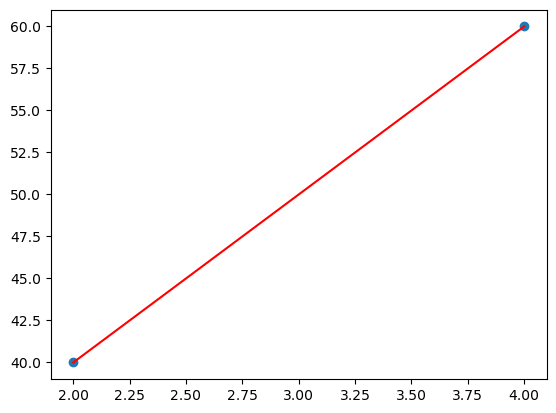

In [132]:
import matplotlib.pyplot as plt
plt.scatter(x,Y)
plt.plot(x,10*x+20, 'r')